# Session 1: Creating the Database - Wyoming (Powder River Basin)
Data: ** Powder River Basin, Wyoming ** <br>
Source: Wyoming Oil and Gas Conservation Commission, http://wogcc.wyo.gov/ 

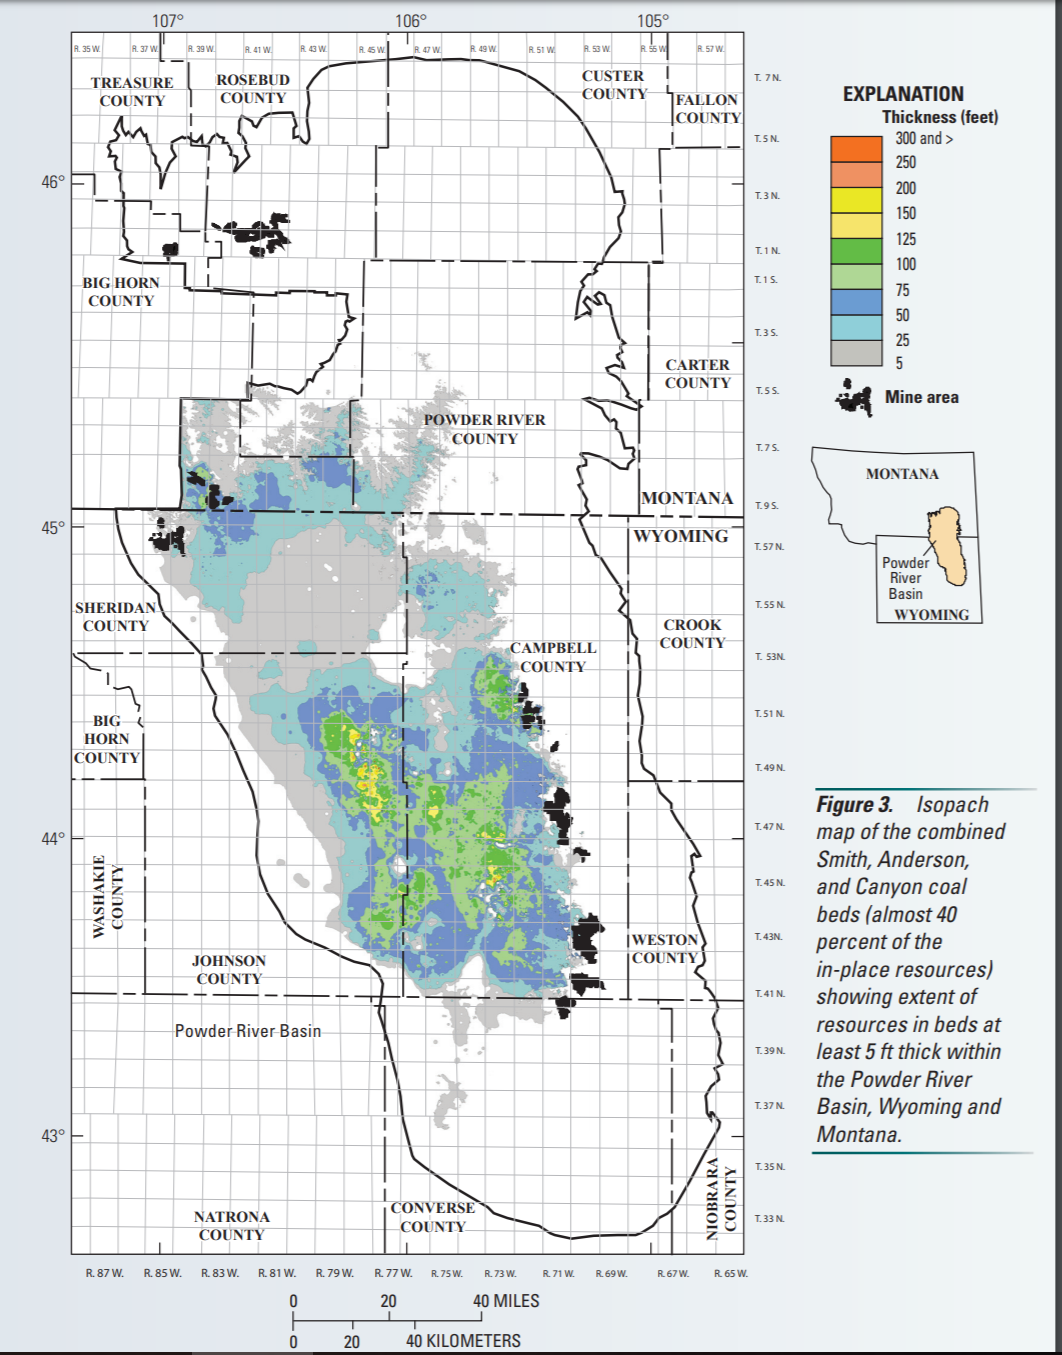

In [38]:
from IPython.display import Image
Image(r"C:\Users\ayush\Desktop\WOGCC\Powder River Basin.png", width="50%", height="50%")

The database will be created in **SQLite3** - https://www.sqlite.org/index.html, one of the popular database engines. <br>
Python Documentation:  - https://docs.python.org/2/library/sqlite3.html

Advantages of SQLite3:

* Doesn’t require a separate server process
* Allows accessing the database using a nonstandard variant of the SQL (Structured Query Language)


First step is to import the basic modules which will be used in the program. 

In [ ]:
import sqlite3                     
from os import listdir             
from os.path import isfile, join  
import pandas as pd

Designate the path where the files are saved. The files can be downloaded from the website and saved as .csv file. <br> 
Make sure all the files are in the same folder. 

In [ ]:
path= r"C:\Users\ayush\Desktop\WOGCC\PowderRivercsv"

Let's look into the files which are accessed in the folder. We will store them in a List called **FilesList**

In [ ]:
from os import walk
FilesList= []
for (dirpath, dirnames, filenames) in walk(path):
    FilesList.extend(filenames)
    break
FilesList

Append all the files listed above and store them in same list

In [ ]:
Production_files = list()
for file in FilesList:
    if file[:10] == 'Production': #matching any file for first 10 characters as production
        Production_files.append(file)

We need to create the connection to the database and provide a cursor for accessing it. <br>

**Connection**:A database connection is the means by which a database server and its client software communicate with each other. <br>

**Cursor**: A database cursor is a control structure that enables traversal over the records in a database. Cursors facilitate subsequent processing in conjunction with the traversal, such as retrieval, addition and removal of database records. <br>

*Reference*: 
- https://en.wikipedia.org/wiki/Database_connection, 
- https://en.wikipedia.org/wiki/Cursor_(databases)

Designate the right path and create the database file. <br>
Here the name is *PowderDb.sqlite*

In [ ]:
conn = sqlite3.connect(path + '/PowderDb.sqlite')
cur = conn.cursor()

In [ ]:
cur.execute('''
DROP TABLE IF EXISTS Production;
''')

cur.execute('''
   CREATE TABLE Production(
   Apino TEXT,Wellname TEXT, County TEXT, Company TEXT,Field_Name TEXT,Horiz_Dir TEXT,Sec TEXT, Twp TEXT,T_Dir TEXT,Rge TEXT,R_Dir TEXT,
   Qtr1 TEXT,Qtr2 TEXT,Lat TEXT,Lon TEXT, Yr TEXT,Jan_oil TEXT,Jan_gas TEXT, Jan_water TEXT,Jan_days TEXT,
   Feb_oil TEXT,Feb_gas TEXT,Feb_water TEXT,Feb_days TEXT,Mar_oil TEXT,Mar_gas TEXT,Mar_water TEXT,Mar_days TEXT,
   Apr_oil TEXT,Apr_gas TEXT,Apr_water TEXT,Apr_days TEXT,May_oil TEXT,May_gas TEXT,May_water TEXT,May_days TEXT,
   Jun_oil TEXT,Jun_gas TEXT,Jun_water TEXT,Jun_days TEXT,Jul_oil TEXT,Jul_gas TEXT,Jul_water TEXT,Jul_days TEXT,
   Aug_oil TEXT,Aug_gas TEXT,Aug_water TEXT,Aug_days TEXT,Sep_oil TEXT,Sep_gas TEXT,Sep_water TEXT,Sep_days TEXT,
   Oct_oil TEXT,Oct_gas TEXT,Oct_water TEXT,Oct_days TEXT,Nov_oil TEXT,Nov_gas TEXT,Nov_water TEXT,Nov_days TEXT,
   Dec_oil TEXT,Dec_gas TEXT,Dec_water TEXT,Dec_days TEXT,Formation TEXT,Wellclass TEXT,Coalbed TEXT,
   Gravity01 TEXT,Gravity02 TEXT,Gravity03 TEXT,Gravity04 TEXT,Gravity05 TEXT,Gravity06 TEXT,Gravity07 TEXT,Gravity08 TEXT,
   Gravity09 TEXT,Gravity10 TEXT,Gravity11 TEXT,Gravity12 TEXT
);
''')

cur.execute('''
DROP TABLE IF EXISTS Production;
''')

Now that the table headers are created, we need to enter the data from .csv files to .sqlite database. We can do so by appending all teh files together

In [ ]:
for file in Production_files:
    df = pd.read_csv(path + '/' + file)
    df.to_sql('Production', conn, if_exists='append', index=False)

The database is created and the connection and cursor could be closed. 

In [ ]:
#Close the cursor and the connection
cur.close()
conn.close()

This is the end of 'Creating the Database Session'. The next step will be to accesss data from the above database and visualize the important parameters while performing detailed analysis on Powder River production data